# <font color="Orange">Curva ROC - AUC</font>

Data 

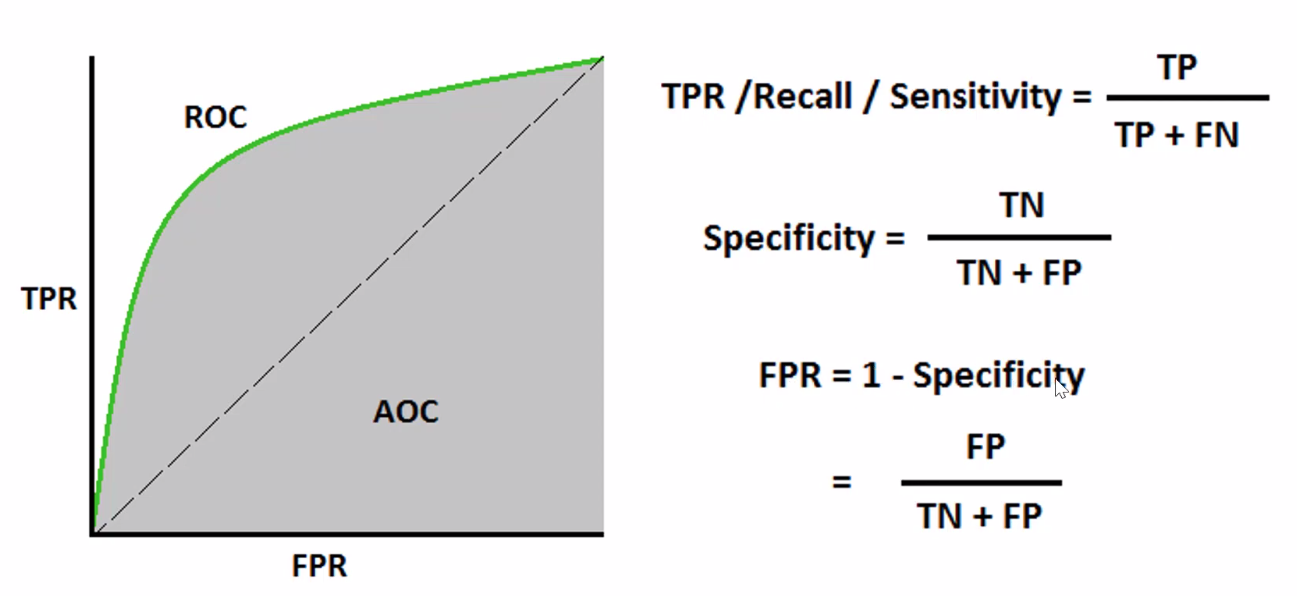

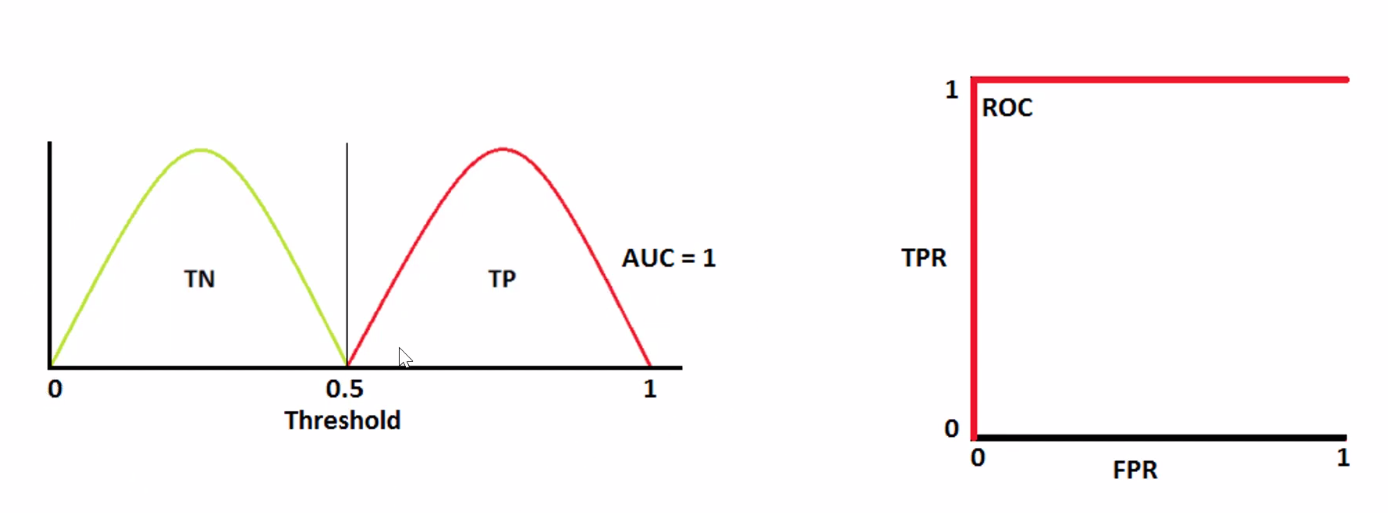

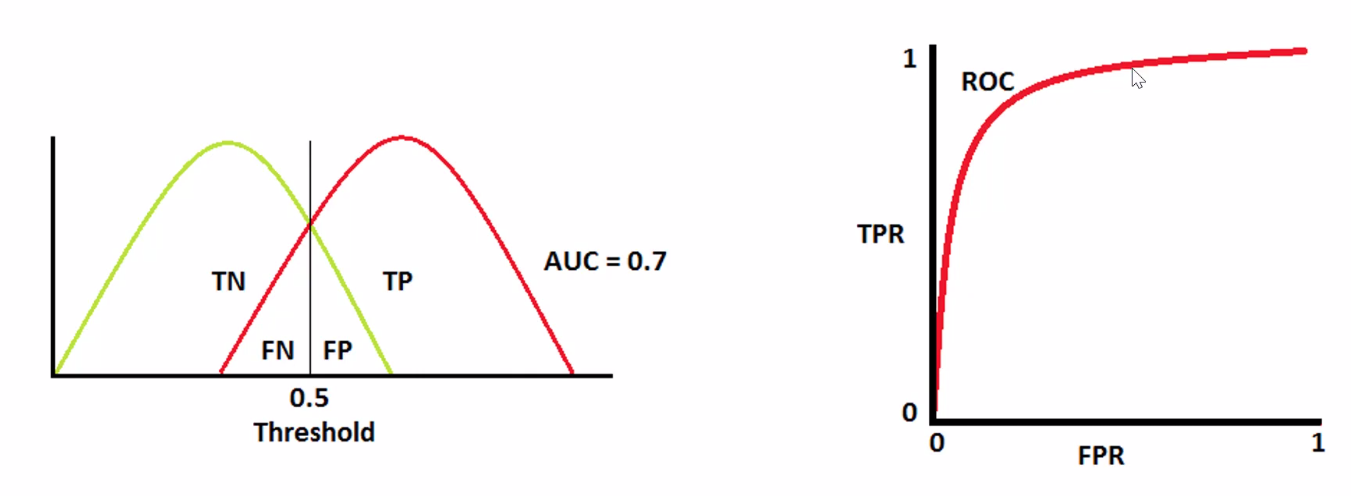

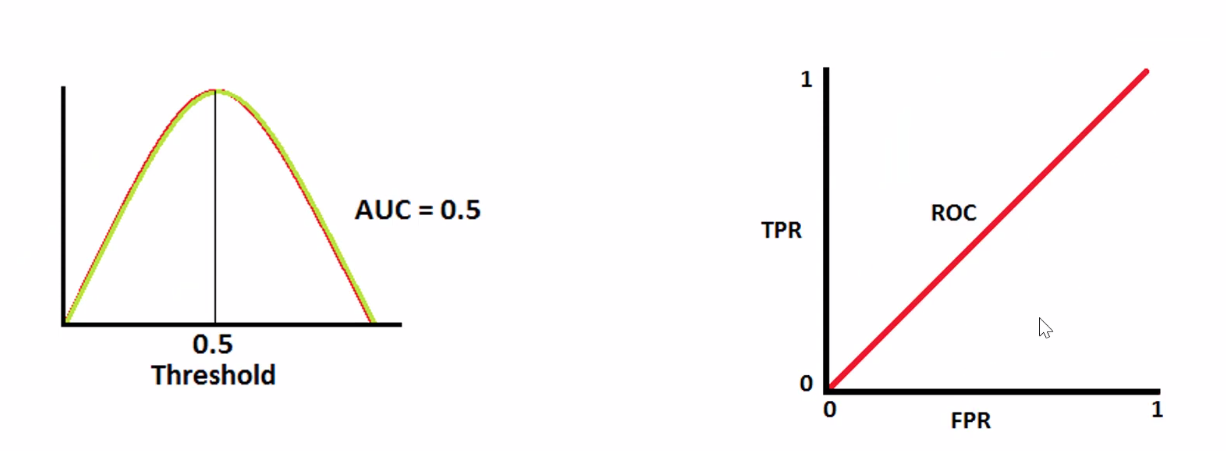

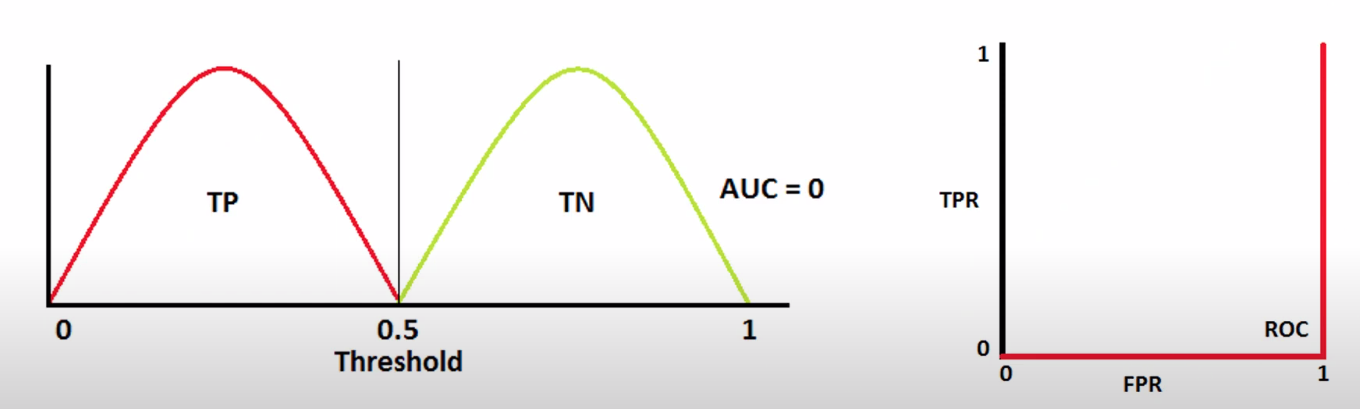

In [1]:
# Importamos as nossas bibliotecas

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score


import pandas as pd 

In [2]:
x, y = make_moons(n_samples = 128)

In [3]:
x.shape

(128, 2)

In [4]:
y.shape

(128,)

In [5]:
x_df = pd.DataFrame(x)
x_df.head()

,0,1
0,1.988831,0.350958
1,0.365341,0.930874
2,1.995031,0.400432
3,1.998757,0.450154
4,0.797133,0.603804


In [6]:
y_df = pd.DataFrame(y)
y_df.head()

,0
0,1
1,0
2,1
3,1
4,0


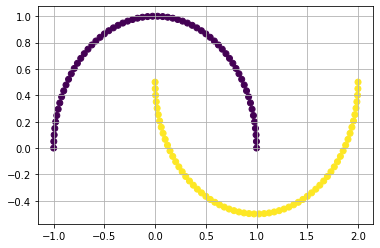

In [7]:
# x[:, 0] --> primeira coluna
# x[:, 1] --> segunda coluna
# c = y --> cor de acordo à classe
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.grid()
plt.show()

In [8]:
# Separamos em Dados de treino e test

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
# Ter em conta o seguinte:

print("Dimensão x_train: ", x_train.shape)
print("Dimensão x_test: ", x_test.shape)
print("Dimensão y_train: ", y_train.shape)
print("Dimensão y_test: ", y_test.shape)

Dimensão x_train:  (96, 2)
Dimensão x_test:  (32, 2)
Dimensão y_train:  (96,)
Dimensão y_test:  (32,)


In [10]:
# Criamos nosso modelo

clf = MLPClassifier()

In [11]:
# Treinamos nossa rede Neural
clf.fit(x_train, y_train) # "x" os Dados e "y" as etiquetas

/home/eddygiusepe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [12]:
# Agora veremos o desempenho de nosso Modelo
# Basicamente calculamos a ACCURACY
clf.score(x_test, y_test)

0.9375

In [13]:
# Calculamos as probabilidades que serão usados na curva ROC

probabilidades = clf.predict_proba(x_test)
probabilidades

array([[0.15503663, 0.84496337],
       [0.0724287 , 0.9275713 ],
       [0.92301307, 0.07698693],
       [0.15868914, 0.84131086],
       [0.1255044 , 0.8744956 ],
       [0.94060118, 0.05939882],
       [0.05494916, 0.94505084],
       [0.70553126, 0.29446874],
       [0.83798567, 0.16201433],
       [0.05103626, 0.94896374],
       [0.93777786, 0.06222214],
       [0.62352212, 0.37647788],
       [0.91217036, 0.08782964],
       [0.75592047, 0.24407953],
       [0.13927853, 0.86072147],
       [0.29447431, 0.70552569],
       [0.90885261, 0.09114739],
       [0.60071218, 0.39928782],
       [0.93201062, 0.06798938],
       [0.94835552, 0.05164448],
       [0.45884017, 0.54115983],
       [0.11351118, 0.88648882],
       [0.17565923, 0.82434077],
       [0.05703916, 0.94296084],
       [0.77585562, 0.22414438],
       [0.39104568, 0.60895432],
       [0.05215521, 0.94784479],
       [0.79347528, 0.20652472],
       [0.94664311, 0.05335689],
       [0.09397904, 0.90602096],
       [0.

In [14]:
# Vamos a usar a probabilidad da coluna 1, ou seja que seja CLASSE 1

probabilidades = probabilidades[:,1]
probabilidades

array([0.84496337, 0.9275713 , 0.07698693, 0.84131086, 0.8744956 ,
       0.05939882, 0.94505084, 0.29446874, 0.16201433, 0.94896374,
       0.06222214, 0.37647788, 0.08782964, 0.24407953, 0.86072147,
       0.70552569, 0.09114739, 0.39928782, 0.06798938, 0.05164448,
       0.54115983, 0.88648882, 0.82434077, 0.94296084, 0.22414438,
       0.60895432, 0.94784479, 0.20652472, 0.05335689, 0.90602096,
       0.44671395, 0.88985481])

In [15]:
auc = roc_auc_score(y_test, probabilidades)

In [16]:
print("A área sob a curva ROC é: {:0.3f}".format(auc))

A área sob a curva ROC é: 0.988


In [17]:
fpr, tpr, thresholds = roc_curve(y_test, probabilidades)

In [18]:
fpr

array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
       0.14285714, 0.14285714, 1.        ])

In [19]:
tpr

array([0.        , 0.05555556, 0.88888889, 0.88888889, 0.94444444,
       0.94444444, 1.        , 1.        ])

In [20]:
thresholds

array([1.94896374, 0.94896374, 0.54115983, 0.44671395, 0.39928782,
       0.37647788, 0.29446874, 0.05164448])

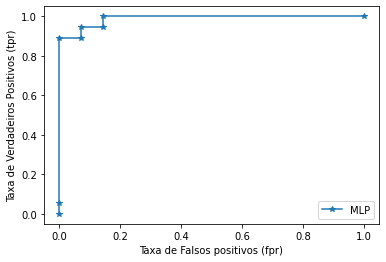

In [21]:
plt.plot(fpr, tpr, marker = "*", label = "MLP")
plt.xlabel("Taxa de Falsos positivos (fpr)")
plt.ylabel("Taxa de Verdadeiros Positivos (tpr)")
plt.legend()
plt.show()